# Depression / Anxiety Prevalence

## Prevalence of Depressive Disorders (SG vs Global)

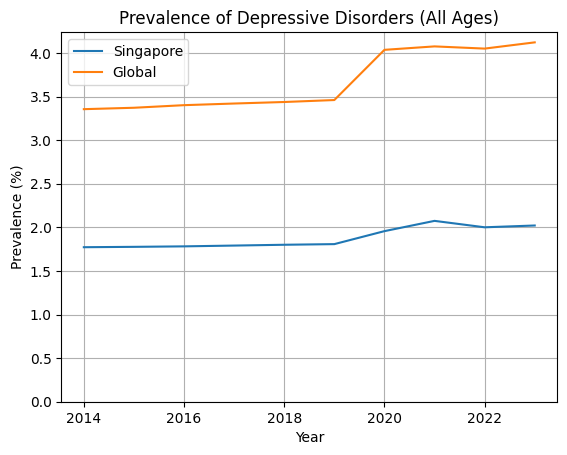

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dep_anx_prevalence.csv")

filtered_df = df[
    (df["age"] == "All ages") &
    (df["metric"] == "Percent") &
    (df["sex"] == "Both") &
    (df["location"].isin(["Singapore", "Global"]))
].copy()

filtered_df["prevalence_pct"] = filtered_df["val"] * 100

dep_df = filtered_df[filtered_df["cause"] == "Depressive disorders"]

plt.figure()

for location in ["Singapore", "Global"]:
    subset = dep_df[dep_df["location"] == location].sort_values("year")
    plt.plot(subset["year"], subset["prevalence_pct"], label=location)

plt.title("Prevalence of Depressive Disorders (All Ages)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.ylim(bottom=0)  
plt.legend()
plt.grid(True)
plt.show()


## Prevalence of Anxiety Disorders (SG vs Global)

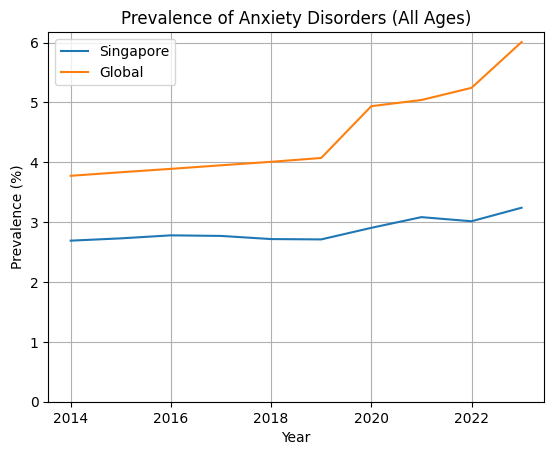

In [24]:
anx_df = filtered_df[filtered_df["cause"] == "Anxiety disorders"]

plt.figure()

for location in ["Singapore", "Global"]:
    subset = anx_df[anx_df["location"] == location].sort_values("year")
    plt.plot(subset["year"], subset["prevalence_pct"], label=location)

plt.title("Prevalence of Anxiety Disorders (All Ages)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()

## Comparison between Anxiety and Depressive Disorders in Singapore

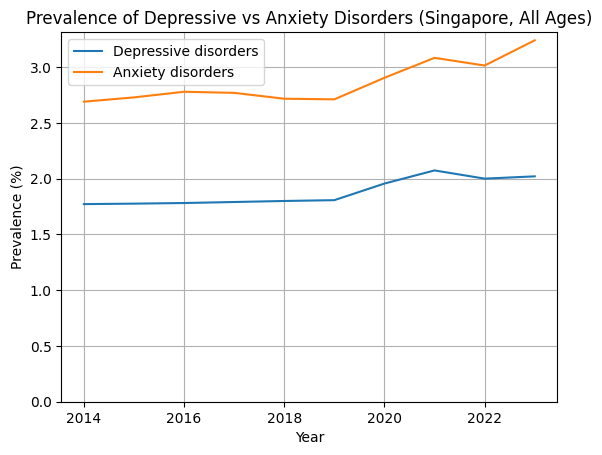

In [25]:

df = pd.read_csv("dep_anx_prevalence.csv")

filtered_df = df[
    (df["location"] == "Singapore") &
    (df["age"] == "All ages") &
    (df["metric"] == "Percent") &
    (df["sex"] == "Both")
].copy()

filtered_df["prevalence_pct"] = filtered_df["val"] * 100

dep_df = filtered_df[filtered_df["cause"] == "Depressive disorders"].sort_values("year")
anx_df = filtered_df[filtered_df["cause"] == "Anxiety disorders"].sort_values("year")


plt.figure()

plt.plot(dep_df["year"], dep_df["prevalence_pct"], label="Depressive disorders")
plt.plot(anx_df["year"], anx_df["prevalence_pct"], label="Anxiety disorders")

plt.title("Prevalence of Depressive vs Anxiety Disorders (Singapore, All Ages)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")

plt.ylim(bottom=0)
plt.legend()
plt.grid(True)

plt.show()


## SG Depressive Disorders (Across ages)

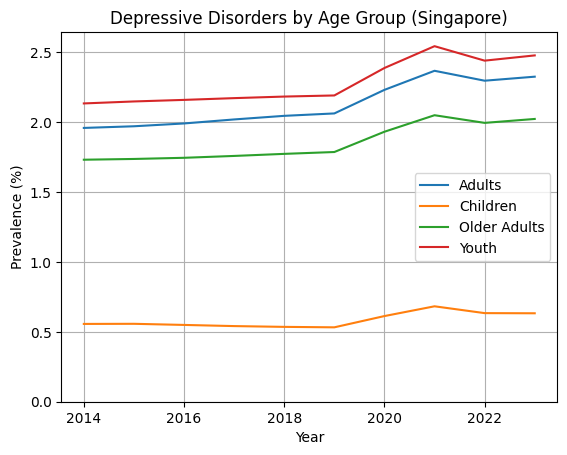

In [26]:
df = pd.read_csv("dep_anx_prevalence.csv")

# Filter Singapore, Percent, Both sexes
df = df[
    (df["location"] == "Singapore") &
    (df["metric"] == "Percent") &
    (df["sex"] == "Both")
].copy()

df["prevalence_pct"] = df["val"] * 100

age_mapping = {
    "<5 years": "Children",
    "5-14 years": "Children",
    "15-19 years": "Youth",
    "20-24 years": "Youth",
    "25-29 years": "Adults",
    "30-34 years": "Adults",
    "35-39 years": "Adults",
    "40-44 years": "Adults",
    "45-49 years": "Older Adults",
    "50-54 years": "Older Adults",
    "55-59 years": "Older Adults",
    "60+ years": "Older Adults"
}

df["age_group"] = df["age"].map(age_mapping)

dep_df = df[df["cause"] == "Depressive disorders"]

# Average within grouped ages
dep_grouped = dep_df.groupby(["year", "age_group"])["prevalence_pct"].mean().reset_index()

plt.figure()

for group in dep_grouped["age_group"].unique():
    subset = dep_grouped[dep_grouped["age_group"] == group].sort_values("year")
    plt.plot(subset["year"], subset["prevalence_pct"], label=group)

plt.title("Depressive Disorders by Age Group (Singapore)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()

## SG Anxiety Disorders (Across ages)

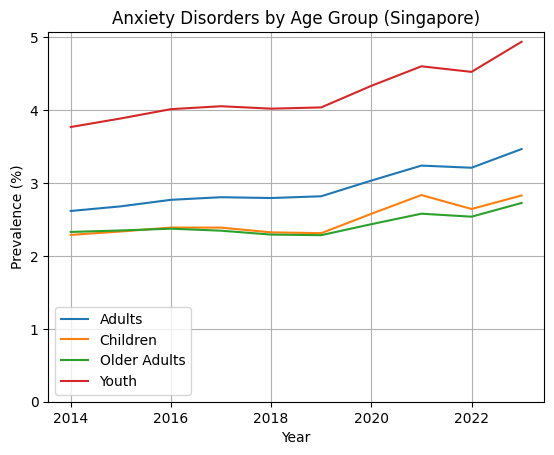

In [27]:
anx_df = df[df["cause"] == "Anxiety disorders"]

anx_grouped = anx_df.groupby(["year", "age_group"])["prevalence_pct"].mean().reset_index()

plt.figure()

for group in anx_grouped["age_group"].unique():
    subset = anx_grouped[anx_grouped["age_group"] == group].sort_values("year")
    plt.plot(subset["year"], subset["prevalence_pct"], label=group)

plt.title("Anxiety Disorders by Age Group (Singapore)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.show()


# Students Social Media Addiction dataset

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Students Social Media Addiction.csv")

print(df.head())
print(df.describe())


   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

## Distribution of Social Media Addiction Scores

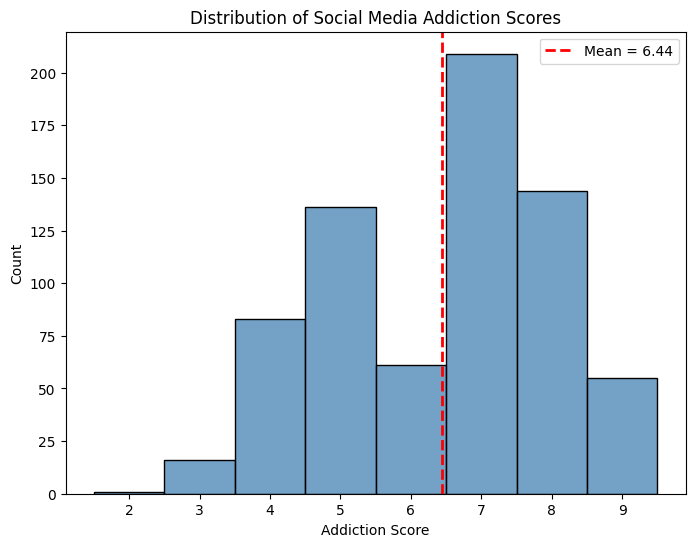

In [29]:
mean_score = df["Addicted_Score"].mean()

plt.figure(figsize=(8,6))

sns.histplot(
    df["Addicted_Score"],
    bins=np.arange(1.5, 10.5, 1),
    color="steelblue"
)

plt.axvline(mean_score, 
            color='red', 
            linestyle='--', 
            linewidth=2,
            label=f"Mean = {mean_score:.2f}")

plt.xticks(range(2, 10))
plt.legend()
plt.title("Distribution of Social Media Addiction Scores")
plt.xlabel("Addiction Score")
plt.ylabel("Count")
plt.show()


## Sleep Hours against Addiction Score

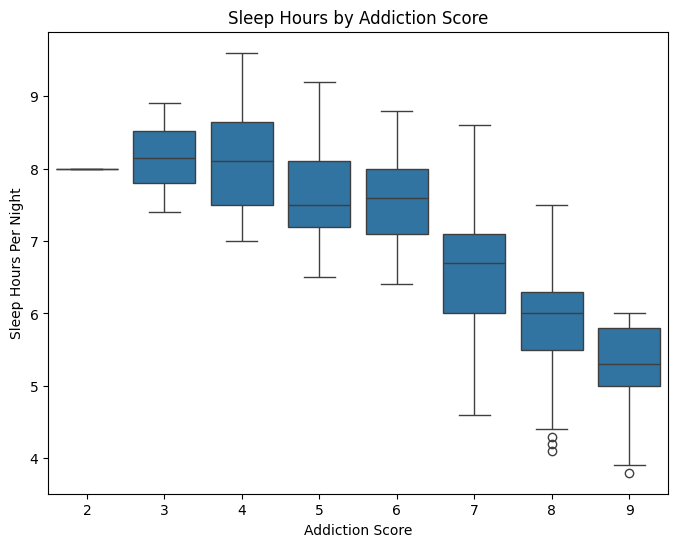

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x="Addicted_Score",
    y="Sleep_Hours_Per_Night",
    data=df
)

plt.title("Sleep Hours by Addiction Score")
plt.xlabel("Addiction Score")
plt.ylabel("Sleep Hours Per Night")
plt.show()


In [31]:
academic_group = df.groupby("Affects_Academic_Performance")["Addicted_Score"].mean()
print(academic_group)


Affects_Academic_Performance
No     4.595238
Yes    7.461369
Name: Addicted_Score, dtype: float64


## Addiction Score by Academics

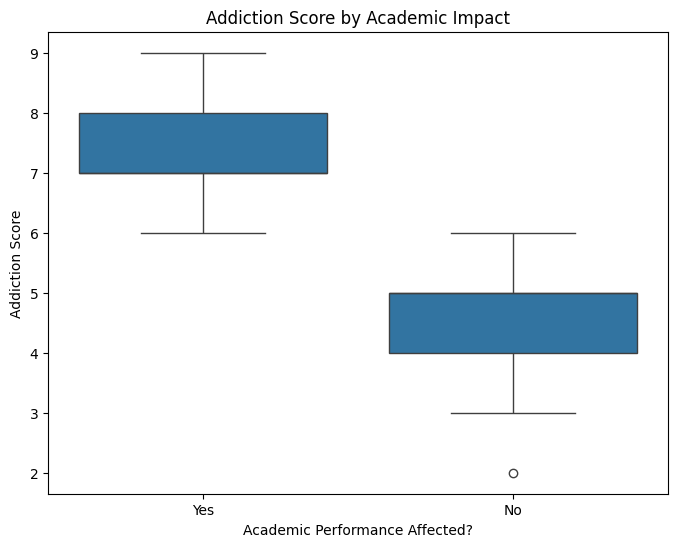

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,
            x="Affects_Academic_Performance",
            y="Addicted_Score")

plt.title("Addiction Score by Academic Impact")
plt.xlabel("Academic Performance Affected?")
plt.ylabel("Addiction Score")
plt.show()


## Conflict against Addiction

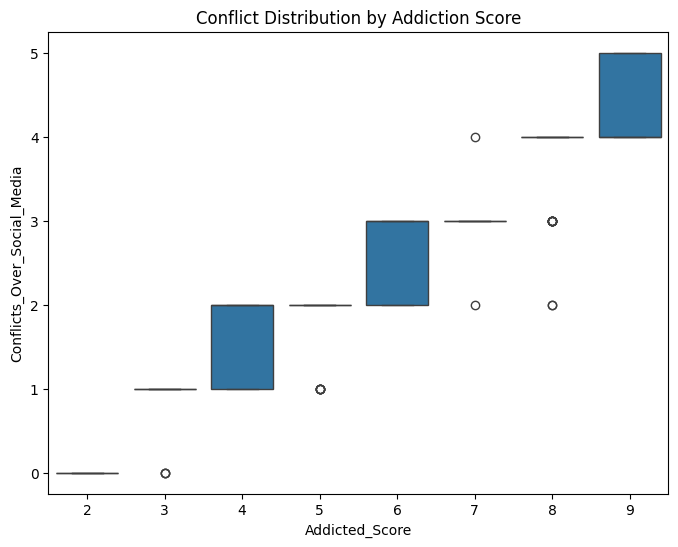

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x="Addicted_Score",
    y="Conflicts_Over_Social_Media",
    data=df
)

plt.title("Conflict Distribution by Addiction Score")
plt.show()


## Addiction vs Platform

In [34]:
platform_means = df.groupby("Most_Used_Platform")["Addicted_Score"].mean().sort_values(ascending=False)
print(platform_means)


Most_Used_Platform
WhatsApp     7.462963
Snapchat     7.461538
TikTok       7.428571
Instagram    6.554217
YouTube      6.100000
WeChat       6.066667
KakaoTalk    6.000000
Facebook     5.666667
Twitter      5.500000
VKontakte    5.000000
LinkedIn     3.809524
LINE         3.000000
Name: Addicted_Score, dtype: float64


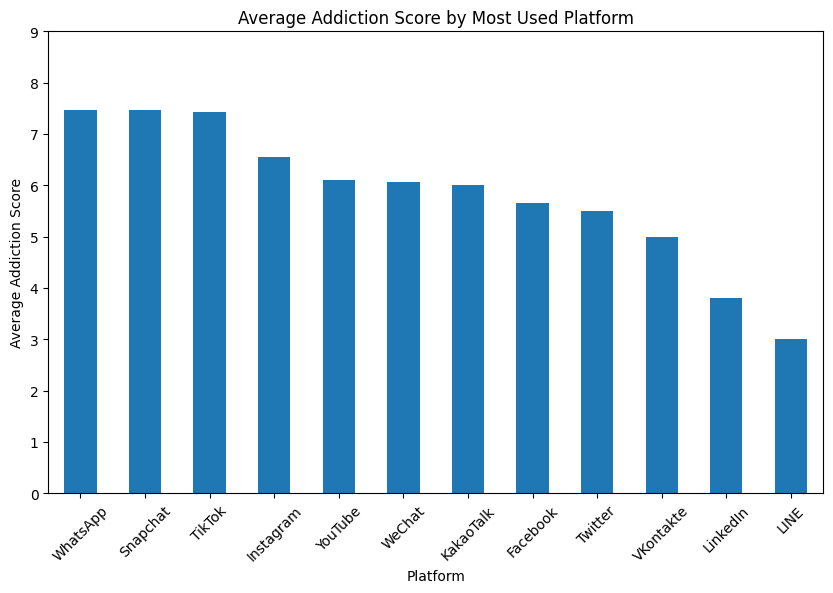

In [35]:
plt.figure(figsize=(10,6))
platform_means.plot(kind="bar")

plt.title("Average Addiction Score by Most Used Platform")
plt.ylabel("Average Addiction Score")
plt.xlabel("Platform")
plt.ylim(0, 9)
plt.xticks(rotation=45)
plt.show()


## Platform usage

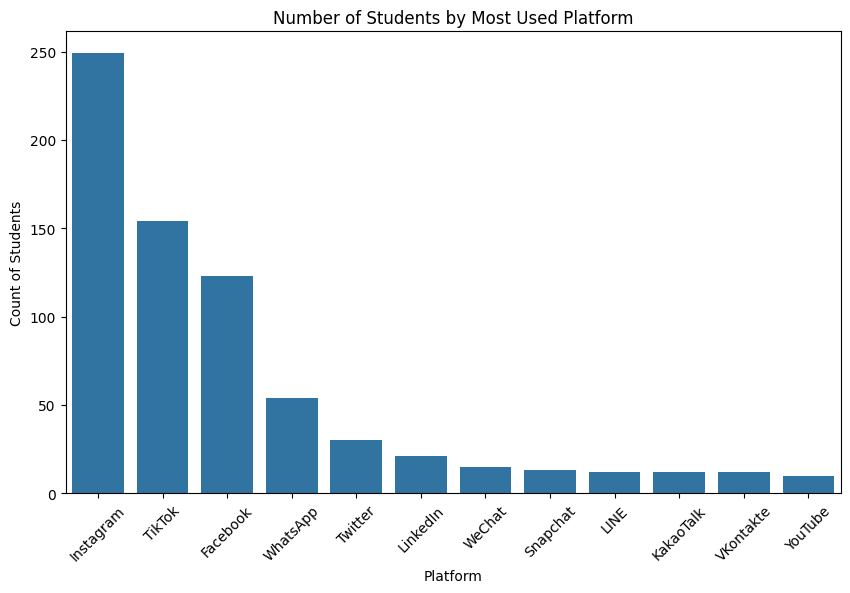

In [36]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="Most_Used_Platform",
    order=df["Most_Used_Platform"].value_counts().index
)

plt.title("Number of Students by Most Used Platform")
plt.xlabel("Platform")
plt.ylabel("Count of Students")
plt.xticks(rotation=45)
plt.show()


## Addiction vs Mental Health

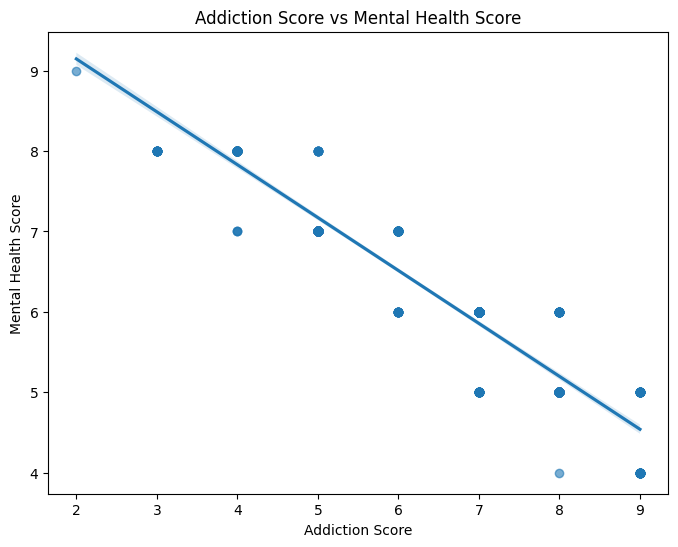

In [37]:
plt.figure(figsize=(8,6))
sns.regplot(data=df,
            x="Addicted_Score",
            y="Mental_Health_Score",
            scatter_kws={"alpha":0.6})

plt.title("Addiction Score vs Mental Health Score")
plt.xlabel("Addiction Score")
plt.ylabel("Mental Health Score")
plt.show()


## Mental Health 

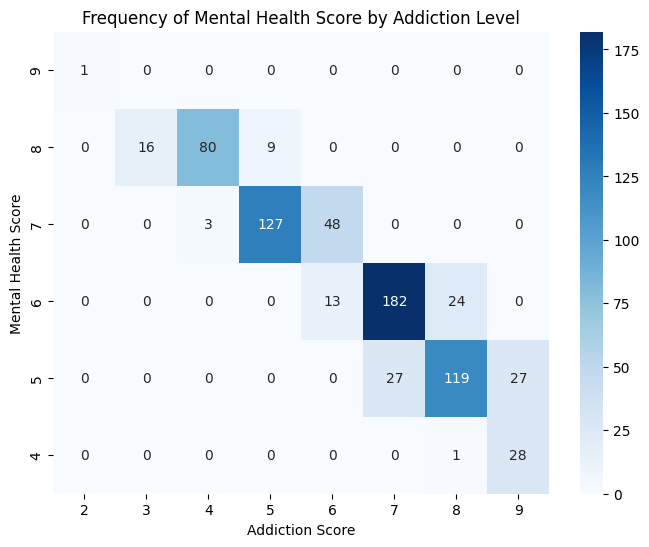

In [ ]:
mh_matrix = pd.crosstab(
    df["Mental_Health_Score"],
    df["Addicted_Score"]
)

plt.figure(figsize=(8,6))

ax = sns.heatmap(
    mh_matrix,
    annot=True,
    cmap="Blues",
    fmt="d"
)

plt.gca().invert_yaxis()

plt.title("Frequency of Mental Health Score by Addiction Level")
plt.ylabel("Mental Health Score")
plt.xlabel("Addiction Score")
plt.show()
